In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=88540b3aa43f814f3c1472da1e593c7557b6286220bd06ad79554af724d92e64
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

from apyori import apriori

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Association Mining/groceries.csv", sep = '\t', header = None)
#data_test = pd.read_csv("/content/drive/My Drive/ER/SVM/SalaryData_Test.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [7]:
data.head(20)

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,pot plants
9,"whole milk,cereals"


In [0]:
#List of lists
lol = []
for i in range(0, 9835):
  lol.append(list(data[0][[i]])[0].split(','))

In [9]:
lol[56]

['packaged fruit/vegetables', 'brown bread', 'canned beer']

In [10]:
len(data)

9835

In [0]:
#For Min length of 2
length_of_rules_2 = []
for i in [0.002, 0.003, 0.004, 0.0045]:
  for j in [0.5, 0.6, 0.7, 0.8, 0.9]:
    association_rules = apriori(lol, min_support = i, min_confidence = j, min_lift = 1.2, min_length = 2)
    length_of_rules_2.append(len(list(association_rules)))

In [0]:
#For Min length of 5
length_of_rules_5 = []
for i in [0.002, 0.003, 0.004, 0.0045]:
  for j in [0.5, 0.6, 0.7, 0.8, 0.9]:
    association_rules = apriori(lol, min_support = i, min_confidence = j, min_lift = 1.2, min_length = 5)
    length_of_rules_5.append(len(list(association_rules)))

In [0]:
#For Min length of 10
length_of_rules_10 = []
for i in [0.002, 0.003, 0.004, 0.0045]:
  for j in [0.5, 0.6, 0.7, 0.8, 0.9]:
    association_rules = apriori(lol, min_support = i, min_confidence = j, min_lift = 1.2, min_length = 10)
    length_of_rules_10.append(len(list(association_rules)))

In [0]:
def to_dataframe(length_of_rules):
  k = 0
  list_of_list = []
  for i in [0.002, 0.003, 0.004, 0.0045]:
    for j in [0.5, 0.6, 0.7, 0.8, 0.9]:
      list_of_list.append([i, j, length_of_rules[k]])
      k+=1

  return list_of_list

In [0]:
rules_df_2 = pd.DataFrame(to_dataframe(length_of_rules_2), columns = ["Min_Support", "Min_Confidence", "Total Rules"])
rules_df_5 = pd.DataFrame(to_dataframe(length_of_rules_5), columns = ["Min_Support", "Min_Confidence", "Total Rules"])
rules_df_10 = pd.DataFrame(to_dataframe(length_of_rules_10), columns = ["Min_Support", "Min_Confidence", "Total Rules"])

In [0]:
heat_map_2 = rules_df_2.pivot( index  = "Min_Support", columns = "Min_Confidence", values = "Total Rules")
heat_map_5 = rules_df_5.pivot( index  = "Min_Support", columns = "Min_Confidence", values = "Total Rules")
heat_map_10 = rules_df_10.pivot( index  = "Min_Support", columns = "Min_Confidence", values = "Total Rules")

Text(0.5, 1, 'Heat Map for Min_Length = 2')

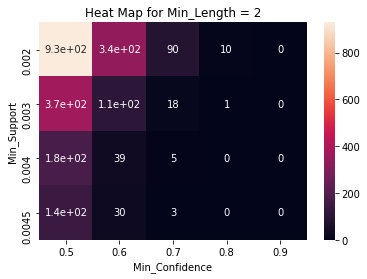

In [36]:
sns.heatmap(heat_map_2, annot = True)
plt.title("Heat Map for Min_Length = 2")

Text(0.5, 1, 'Heat Map for Min_Length = 5')

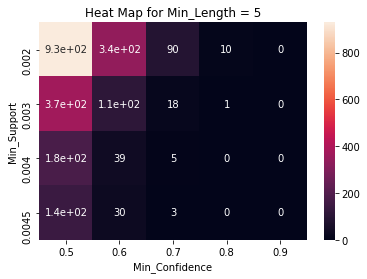

In [37]:
sns.heatmap(heat_map_5, annot = True)
plt.title("Heat Map for Min_Length = 5")

Text(0.5, 1, 'Heat Map for Min_Length = 10')

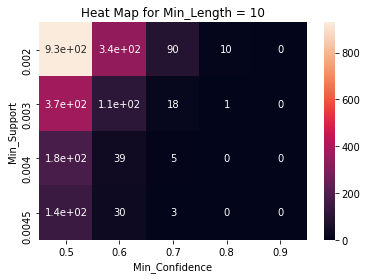

In [38]:
sns.heatmap(heat_map_10, annot = True)
plt.title("Heat Map for Min_Length = 10")